In [1]:
import tensorflow as tf
tf.enable_eager_execution()   # 动态图机制
print(tf.__version__)

1.10.0


参考: 
* [终于！TensorFlow引入了动态图机制Eager Execution](https://www.jiqizhixin.com/articles/2017-11-01-12)

In [2]:
import numpy as np
import pandas as pd   # data processing, CSV file I/O 

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from subprocess import check_output

In [8]:
!python -V

Python 3.6.5


In [4]:
data_train_file = "data/fashion-mnist_train.csv"
data_test_file = "data/fashion-mnist_test.csv"

df_train = pd.read_csv(data_train_file)
df_test = pd.read_csv(data_test_file)

In [6]:
pd.options.display.max_columns = None   # 显示所有列数据
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [47]:
df_train['label'].unique()   # 查看有多少种label

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [20]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [26]:
df_train.columns  

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [28]:
df_train.values[:, 0]

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

## Preprocessing the data

In [81]:
def get_features_labels(df):
    # Select all columns but the first
    features = df.values[:, 1:]/255
    # The first column is the label. Conveniently called 'label'
    labels = df.values[:, 0]   # labels = df['label'].values
    return features, labels

In [82]:
train_features, train_labels = get_features_labels(df_train)
test_features, test_labels = get_features_labels(df_test)

In [83]:
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [84]:
# take a peak at some values in an image
train_features[20, 300:320]

array([0.        , 0.00392157, 0.00392157, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1372549 ,
       0.64705882, 0.10588235, 0.        , 0.0745098 , 0.1254902 ])

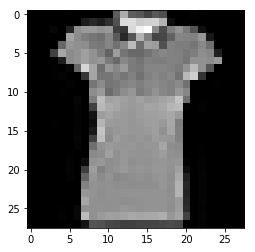

In [85]:
example_index = 221
plt.figure()
_ = plt.imshow(np.reshape(train_features[example_index, :], (28, 28)), 'gray')

## Convert labels to one-hot encoding

In [86]:
train_labels.shape

(60000,)

In [87]:
train_labels[example_index]

0

In [88]:
train_labels = tf.keras.utils.to_categorical(train_labels)   # 转化为 One-hot 独热编码
test_labels = tf.keras.utils.to_categorical(test_labels)

In [89]:
train_labels.shape

(60000, 10)

In [90]:
train_labels[example_index]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [91]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

## Create the model

In [92]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(30, activation=tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Create a Tensorflow optimizer, rather than using the Keras version
# This is currently necessary when working in eager mode
optimizer = tf.train.RMSPropOptimizer(learning_rate=0.001)

# We will now compile and print out a summary of our model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


## Training with Keras

In [93]:
EPOCHS = 2
BATCH_SIZE = 128

In [94]:
model.fit(train_features, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/2
60000/60000 [==============================] - 4s 62us/step - loss: 0.9252 - acc: 0.6842
Epoch 2/2
60000/60000 [==============================] - 3s 58us/step - loss: 0.4733 - acc: 0.8335


## Control Training using datasets

In [95]:
def make_generator(features, labels):
    def _generator():
        for feature, label in zip(features, labels):
            yield feature, label
            
    return _generator

In [96]:
dataset = tf.data.Dataset.from_generator(
    make_generator(train_features, train_labels), 
    (tf.float32, tf.float32))

dataset = dataset.shuffle(1000)
dataset = dataset.batch(BATCH_SIZE)

参考: 
* [如何使用TensorFlow中的Dataset API](https://blog.csdn.net/dqcfkyqdxym3f8rb0/article/details/79342369)

In [97]:
for epoch in range(EPOCHS):
    step = 0
    for features, labels in dataset:
        train_loss, train_accuracy = model.train_on_batch(features, labels)
        if step % 100 == 0:
            print('Step #%3d: Loss: %.6f\tAccuracy: %.6f' % (step+1, train_loss, train_accuracy))
        step += 1
            
    # Here you can gather any metrics or adjust your training parameters
    print('Epoch #%d\t Loss: %.6f\tAccuracy: %.6f' % (epoch+1, train_loss, train_accuracy))

Step #  1: Loss: 0.519109	Accuracy: 0.804688
Step #101: Loss: 0.380441	Accuracy: 0.867188
Step #201: Loss: 0.330039	Accuracy: 0.890625
Step #301: Loss: 0.369543	Accuracy: 0.875000
Step #401: Loss: 0.290435	Accuracy: 0.867188
Epoch #1	 Loss: 0.451222	Accuracy: 0.812500
Step #  1: Loss: 0.499012	Accuracy: 0.812500
Step #101: Loss: 0.466631	Accuracy: 0.804688
Step #201: Loss: 0.385222	Accuracy: 0.890625
Step #301: Loss: 0.337454	Accuracy: 0.851562
Step #401: Loss: 0.359851	Accuracy: 0.867188
Epoch #2	 Loss: 0.370507	Accuracy: 0.833333


In [98]:
print(test_features.shape)
print(test_labels.shape)

(10000, 784)
(10000, 10)


In [100]:
test_loss, test_acc = model.evaluate(test_features, test_labels)

10000/10000 [==============================] - 1s 55us/step


In [101]:
print('test_acc:', test_acc)

test_acc: 0.8612


源代码: [Fashion-MNIST with keras](https://www.kaggle.com/yufengg/fashion-mnist-with-keras/data)